# Multimodal Measures and Analysis of User Performance Demo
## Dr. Greg Placencia

## Objective:  
Students who successfully finish this notebook should be able to:
- Read a file into a dataframe
- Print information about data in a dataframe
- Clean dirty data from a source file
- Visualize data
- Conduct a t-test in Python

## Potential libraries
# python -m spacy download en_core_web_sm
import gensim #https://pypi.org/project/gensim/; https://github.com/piskvorky/gensim  
import stanfordnlp #https://nlp.stanford.edu/software/  
import corenlp #https://nlp.stanford.edu/software/  
import pattern  
from textblob import TextBlob 
import textblob #https://textblob.readthedocs.io/en/dev/  

import sklearn #https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.htmli  
import pynlpl #https://pypi.org/project/PyNLPl/  
import polyglot #https://polyglot.readthedocs.io/en/latest/  
import pytorch #https://pytorch.org/tutorials/beginner/deep_learning_nlp_tutorial.html

# Import libraries

In [127]:
#install libraries
#!pip install polars

# import libraries for analysis
import numpy as np
import pandas as pd
import polars as pl #https://pola.rs/

import scipy.stats as stats #statistics library; https://scipy.org/

#import libraries for visualization
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #import visualization library

#import NLP libraires for Qualitative Analysis
import nltk #https://www.nltk.org/
import spacy #https://spacy.io/
#import eng_spacysentiment
#import gensim #https://pypi.org/project/gensim/; https://github.com/piskvorky/gensim

import sklearn #Machine Learning Library

# Create Data Frame

In [130]:
# check if we are using a pandas or polars dataframe
"""Checks if the given object is a pandas DataFrame or a Polars DataFrame.
  Args:
    df: The object to check.

  Returns:
    A string indicating the type of the DataFrame or None if it's not a DataFrame.
  """
def check_dataframe_type(df):
    if isinstance(df, pd.DataFrame):
        return "pandas"
    elif isinstance(df, pl.DataFrame):
        return "polars"
    else:
        return None

In [132]:
# Read csv file. Change file name as needed
#df = pd.read_csv('lab2_data_S24.csv')
#df_full = pd.read_csv('lab2_data.csv')

df = pl.read_csv('lab2_data_S24.csv')
#df_full = pl.read_csv('lab2_data.csv')

if check_dataframe_type(df) == "pandas":
    print("Using pandas DataFrame")

if check_dataframe_type(df) == "polars":
    print("Using polars DataFrame")

Using polars DataFrame


# Print first 5 entries and Remove data we dont need

In [135]:
print("First Five Row of Data\n", df.head()) #print first 5 entries
#df.drop(df.loc[:, 'RecordedDate':'ID'].columns, axis=1, inplace=True)

First Five Row of Data
 shape: (5, 9)
┌──────────┬────────┬─────────┬─────────┬───┬─────────┬───────────┬───────────┬────────────────────┐
│ ID       ┆ Gender ┆ Task t1 ┆ Task t2 ┆ … ┆ Task e2 ┆ Task      ┆ Task      ┆ Task Sentiment     │
│ ---      ┆ ---    ┆ ---     ┆ ---     ┆   ┆ ---     ┆ Ratings_1 ┆ Ratings_2 ┆ ---                │
│ i64      ┆ i64    ┆ f64     ┆ f64     ┆   ┆ i64     ┆ ---       ┆ ---       ┆ str                │
│          ┆        ┆         ┆         ┆   ┆         ┆ i64       ┆ i64       ┆                    │
╞══════════╪════════╪═════════╪═════════╪═══╪═════════╪═══════════╪═══════════╪════════════════════╡
│ 15869477 ┆ 1      ┆ 74.0    ┆ 38.0    ┆ … ┆ 0       ┆ 4         ┆ 2         ┆ I felt that the    │
│          ┆        ┆         ┆         ┆   ┆         ┆           ┆           ┆ first task was…    │
│ 14391117 ┆ 1      ┆ 69.0    ┆ 35.0    ┆ … ┆ 1       ┆ 4         ┆ 1         ┆ It does require    │
│          ┆        ┆         ┆         ┆   ┆        

# Examine and Cleanup Data

# Print Descriptive Data
A first step should be to examine the data for missing data.

In [139]:
print(df.describe())

if check_dataframe_type(df) == "pandas": # polars needs to check for nulls, polars does it by itself
    if df.isnull: # check if null values
        print('Missing Data Raw\n')
        print(df.isna().sum()) # print number of empty cells

shape: (9, 10)
┌────────────┬───────────┬──────────┬───────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ statistic  ┆ ID        ┆ Gender   ┆ Task t1   ┆ … ┆ Task e2  ┆ Task      ┆ Task      ┆ Task      │
│ ---        ┆ ---       ┆ ---      ┆ ---       ┆   ┆ ---      ┆ Ratings_1 ┆ Ratings_2 ┆ Sentiment │
│ str        ┆ f64       ┆ f64      ┆ f64       ┆   ┆ f64      ┆ ---       ┆ ---       ┆ ---       │
│            ┆           ┆          ┆           ┆   ┆          ┆ f64       ┆ f64       ┆ str       │
╞════════════╪═══════════╪══════════╪═══════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ count      ┆ 32.0      ┆ 29.0     ┆ 32.0      ┆ … ┆ 32.0     ┆ 32.0      ┆ 32.0      ┆ 32        │
│ null_count ┆ 0.0       ┆ 3.0      ┆ 0.0       ┆ … ┆ 0.0      ┆ 0.0       ┆ 0.0       ┆ 0         │
│ mean       ┆ 1.5396e7  ┆ 1.275862 ┆ 64.881563 ┆ … ┆ 0.25     ┆ 3.78125   ┆ 1.6875    ┆ null      │
│ std        ┆ 1.4239e6  ┆ 0.527565 ┆ 13.565419 ┆ … ┆ 0.567962 ┆ 0.706394  ┆

# Impute Values as needed [1] - [2]
If there are missing values we can remove them from the dataframes.  
Unfortunately we lose datapoints this way and reinforce data bias.
  
It is better to clean the data by using existing data:

In [142]:
if check_dataframe_type(df) == "pandas":
    df['Task t1'].fillna(df['Task t1'].mean(), inplace = True) #use column mean to fill missing data
    df['Task t2'].fillna(df['Task t2'].mean(), inplace = True) #use column mean to fill missing data
    df.isna().sum()

if check_dataframe_type(df) == "polars":
    df.select(pl.mean("Task t1", "Task t2"))

# Analyze and Visualize Differences in Data
It also helps to visualize data if the dimensionality is low (<4)

In [145]:
# Create proper dataframe
if check_dataframe_type(df) == "pandas":
    task_data = df.loc[:, ['Task t1', 'Task t2']]
    task_data.rename({'Task t1': 'Task 1', 'Task t2': 'Task 2'}, axis=1, inplace=True)
    
if check_dataframe_type(df) == "polars":
    task_data = df.select(["Task t1", "Task t2"])
    task_data = task_data.rename({"Task t1":"Task 1", "Task t2":"Task 2"})

print(task_data.head())

shape: (5, 2)
┌────────┬────────┐
│ Task 1 ┆ Task 2 │
│ ---    ┆ ---    │
│ f64    ┆ f64    │
╞════════╪════════╡
│ 74.0   ┆ 38.0   │
│ 69.0   ┆ 35.0   │
│ 59.19  ┆ 34.25  │
│ 60.92  ┆ 31.4   │
│ 54.03  ┆ 35.29  │
└────────┴────────┘


## Show Task Time Distribution
A common practice is to create a histogram to show the underlying disribution.  
A Kernal Density Estimator (KDE) is often shows this much more smoothly.

<class 'polars.dataframe.frame.DataFrame'>


C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

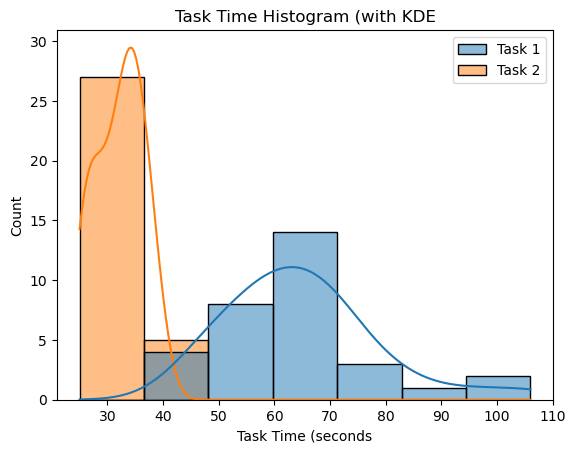

In [148]:
print(type(task_data))
plot = sns.histplot(data=task_data.to_pandas(), kde = True) # Create task time histogram
plot.set_title("Task Time Histogram (with KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Count")

C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Percentage')

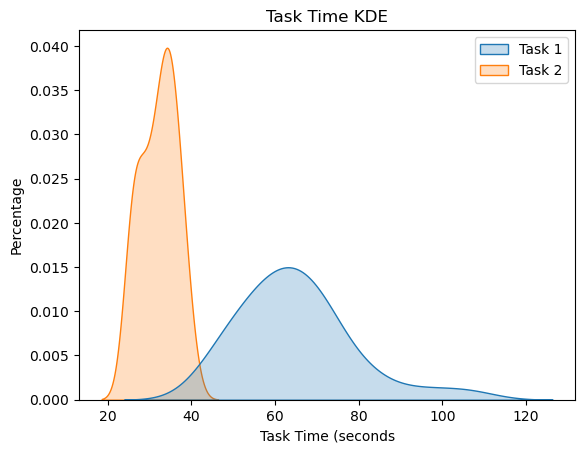

In [150]:
plot = sns.kdeplot(data=task_data.to_pandas(), fill = True) # # Create task time Kernal Desensity Estimation
plot.set_title("Task Time KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Percentage")

## Show Scatterplot
A scatterplot often shows clusters in data

Text(0, 0.5, 'Task Completion Time (seconds)')

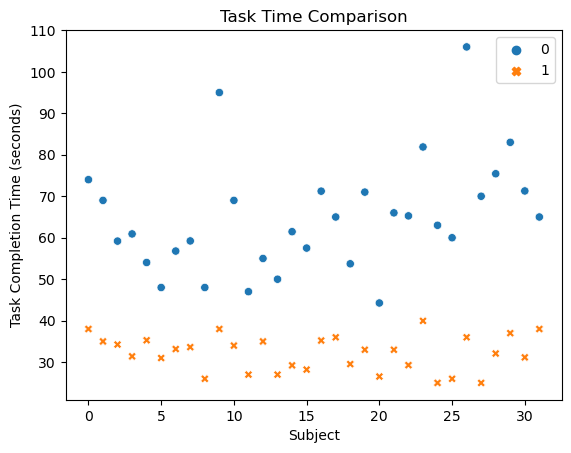

In [153]:
plot=sns.scatterplot(data=task_data)
plot.set_title("Task Time Comparison")
plot.set_xlabel("Subject")
plot.set_ylabel("Task Completion Time (seconds)")

# Jointplot [4]
Notice that histograms and line graphs are 2 dimensional, and may not show data differences as well.  
Jointplots may help by plotting two distributions against each to give an "overhead" map 
  
Jointplots in seabornr use the following:  
- kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }  
  
Scatter is the default  

C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

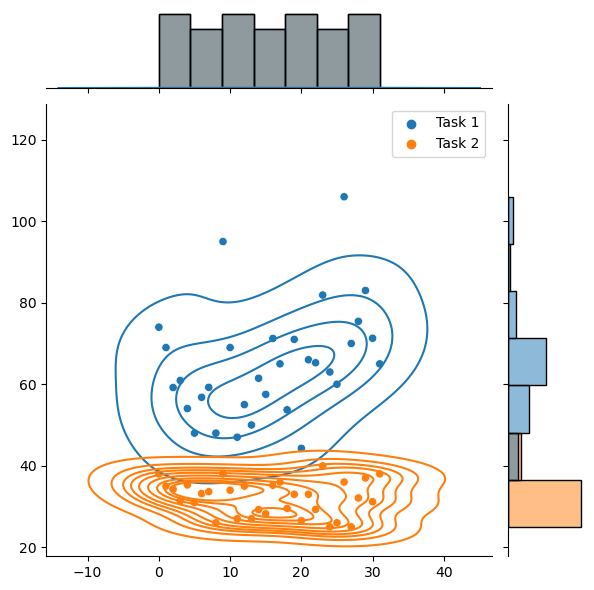

In [156]:
plot=sns.jointplot(data=task_data.to_pandas(), kind="kde")
plot.plot(sns.scatterplot, sns.histplot)

# Finding if data is statistically different
Student’s t-test, is a method to test whether the difference between two groups is statistically significant or not.
We start by assuming there is no statistical difference, i.e. the null hypthesis. Any difference in means is a result of chance, not.  
A simple way to do this is to compare the average difference between the two tasks to see if it is statistically significant. This is called a within-subject paired Student's t-test or paired samples t-test because the participants are the same, only the tasks differ, hence paired data.  
   
The t distribution is a family of curves that is specified by the number of degrees of freedom (the number of independent observations in the sample minus one). The t distribution approaches the bell shape of the standard normal distribution as sample size, and thus the degrees of freedom, increases.  
In practice, tests involving the mean of a sample of size greater than 30, we usually apply the normal distribution instead.

## Find the difference in the data and plot it

shape: (32, 3)
┌────────┬────────┬────────────┐
│ Task 1 ┆ Task 2 ┆ Difference │
│ ---    ┆ ---    ┆ ---        │
│ f64    ┆ f64    ┆ f64        │
╞════════╪════════╪════════════╡
│ 74.0   ┆ 38.0   ┆ 36.0       │
│ 69.0   ┆ 35.0   ┆ 34.0       │
│ 59.19  ┆ 34.25  ┆ 24.94      │
│ 60.92  ┆ 31.4   ┆ 29.52      │
│ 54.03  ┆ 35.29  ┆ 18.74      │
│ …      ┆ …      ┆ …          │
│ 70.0   ┆ 25.0   ┆ 45.0       │
│ 75.43  ┆ 32.09  ┆ 43.34      │
│ 83.0   ┆ 37.0   ┆ 46.0       │
│ 71.28  ┆ 31.16  ┆ 40.12      │
│ 65.0   ┆ 38.0   ┆ 27.0       │
└────────┴────────┴────────────┘


C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Percentage')

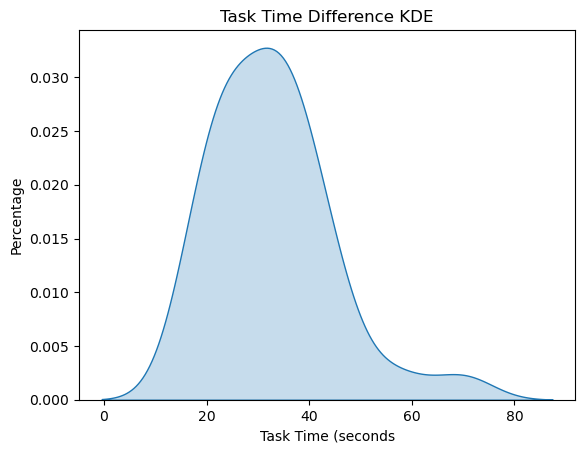

In [160]:

if check_dataframe_type(df) == "pandas":
    task_data['Difference'] = task_data['Task 1']- task_data['Task 2']
if check_dataframe_type(df) == "polars":
    difference = task_data["Task 1"] - task_data["Task 2"]  # Calculate difference directly
    task_data = task_data.with_columns(difference.alias("Difference"))  # Add with alias

print(task_data)

plot = sns.kdeplot(data=difference, fill = True) # Create task time difference histogram
plot.set_title("Task Time Difference KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Percentage")

# Calculate if the difference is statistically significant
For this we assume that alpha = 0.05 is our significance level  
The formula to get the t value is:  
$$
t = \frac{\sum D} {\sqrt {\frac{{n}{\sum D^2}{-({\sum D})^2}} {n-1}}}
$$

## References
- https://jupyterbook.org/en/stable/content/math.html  
- https://docs.mathjax.org/en/latest/

# Calculate Task Time paired t test (Within Subject t-test)
alpha = 0.05 # significance  
#ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [164]:
result = stats.ttest_rel(task_data['Task 1'], task_data['Task 2'], alternative='greater')

#print(result)
print(f'statistic: {result.statistic:.3}')
print(f'pvalue: {result.pvalue:.3}')
print(f'Degrees of Fredom (dof = n-1): {result.df}')

statistic: 15.9
pvalue: 8.98e-17
Degrees of Fredom (dof = n-1): 31


## Discussion

### References:
[1] Pierre Sadrach. (2020). Pandas Tricks for Imputing Missing Data: Imputing Data with Pandas. Medium: Towards Data Science. Jun 4, 2020. Online https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6. Accessed  October 18, 2023

[2] Ismiguzel, I. (2022). Imputing missing data with simple and advanced techniques. Medium: Towards Data Science. 2022, May 12. Online. https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87. Accessed Sept 8, 2024.

[3] https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

[4] seaborn.jointplot. online https://seaborn.pydata.org/generated/seaborn.jointplot.html. accessed October 18, 2023.

Sentiment Analysis: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6  
Word Cloud: https://medium.com/@siglimumuni/natural-language-processing-in-python-exploring-word-frequencies-with-nltk-918f33c1e4c3  
Topic Modeling:  

LDA: https://medium.com/@corymaklin/latent-dirichlet-allocation-dfcea0b1fddc#:~:text=37,organize%20and%20search%20through%20documents  
